# Primary EDA of row data

In [3]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.sql import text
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.graph_objects as go

import sys
from importlib import reload
sys.path.append('../../') 
from credentials import DB_username, DB_password, DB_host, DB_name

In [4]:
# create engine 
for_engine = f'postgresql+psycopg2://{DB_username}:{DB_password}@{DB_host}/{DB_name}'
engine = create_engine(for_engine)

In [36]:
sql = text("SELECT * FROM data.kline_price where category=2 and interval=5 and symbol=1")
kline = pd.read_sql(sql, con=engine).sort_values(by='datetime')
kline['datetime'] = pd.to_datetime(kline['datetime'])
kline.head(1)

,id,datetime,category,interval,symbol,open,high,low,volume,turnover,close,source,created_dt
0,5465002,2020-06-21 20:00:00,2,5,1,9345.5,9345.5,9328.5,141.361,1318686.1,9328.5,2,2024-03-12 16:04:29


In [37]:
'''
figure(figsize=(8, 6), dpi=80)
fig = go.Figure(data=[go.Candlestick(x=kline['datetime'],
                open=kline['open'],
                high=kline['high'],
                low=kline['low'],
                close=kline['close'])])

fig.show()
'''

"\nfigure(figsize=(8, 6), dpi=80)\nfig = go.Figure(data=[go.Candlestick(x=kline['datetime'],\n                open=kline['open'],\n                high=kline['high'],\n                low=kline['low'],\n                close=kline['close'])])\n\nfig.show()\n"

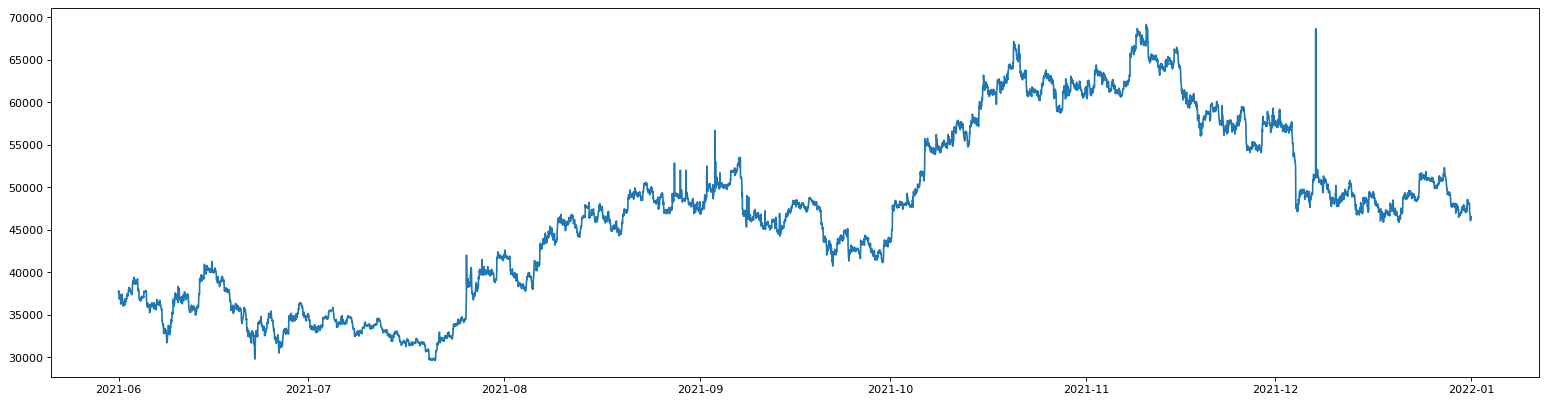

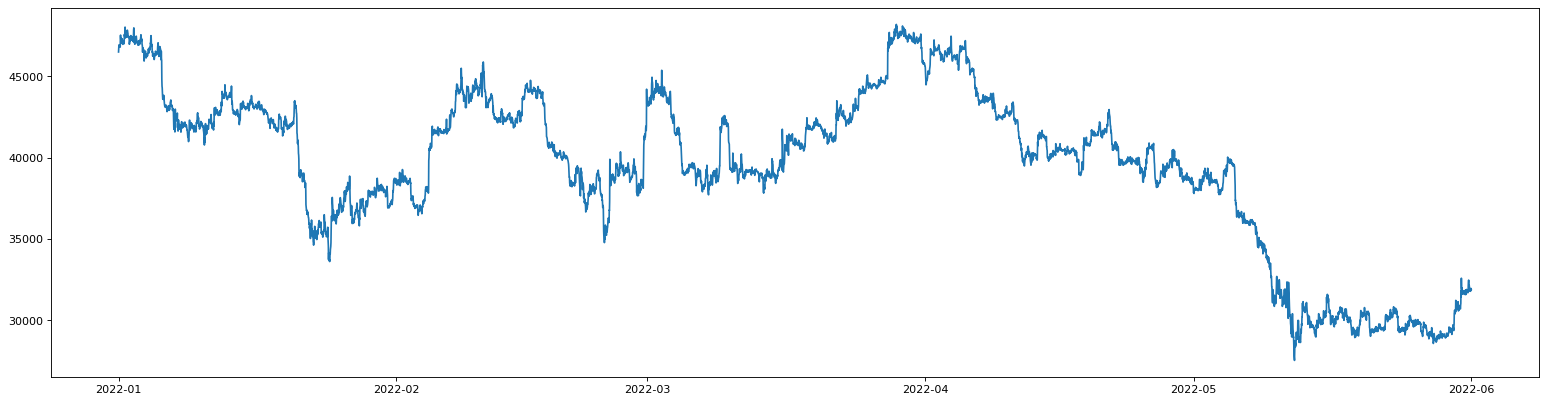

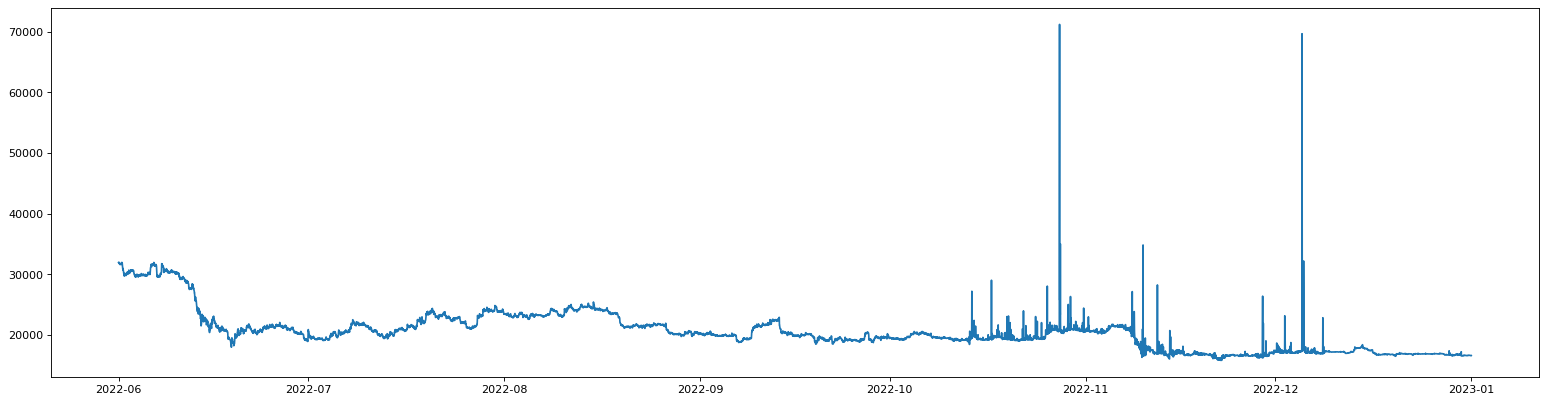

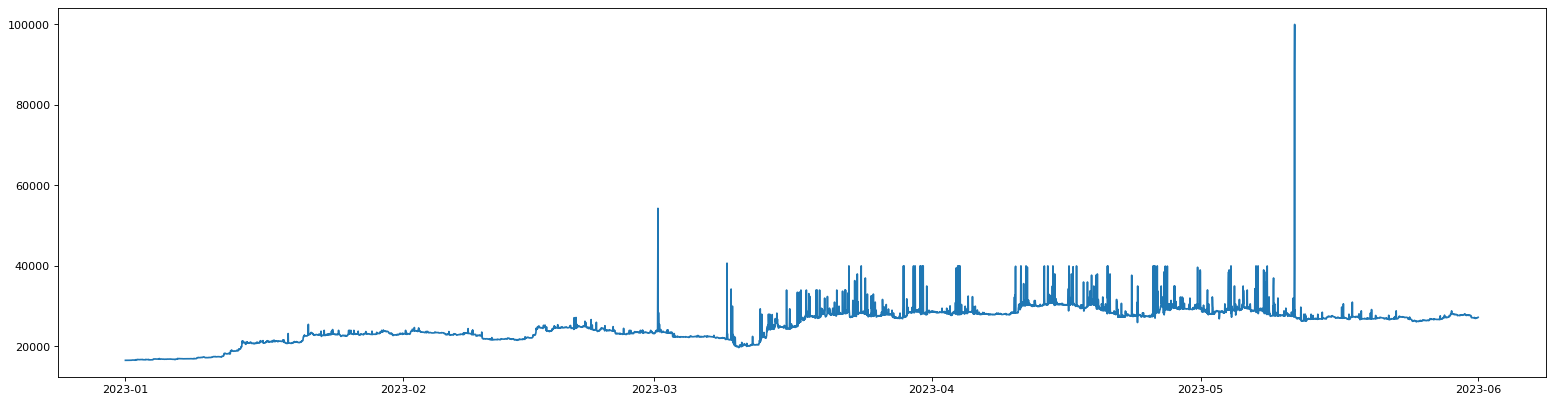

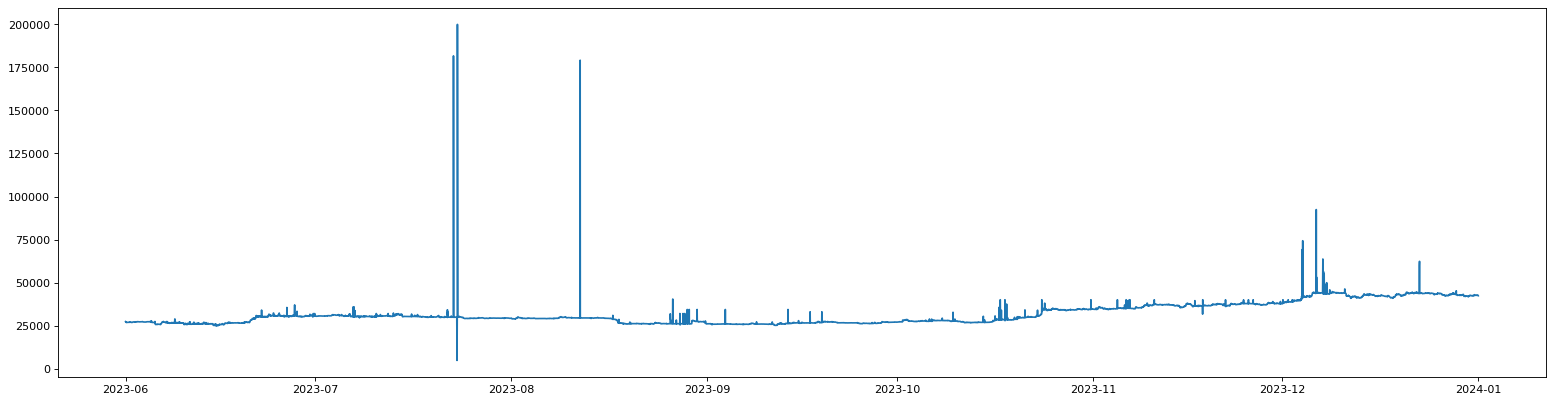

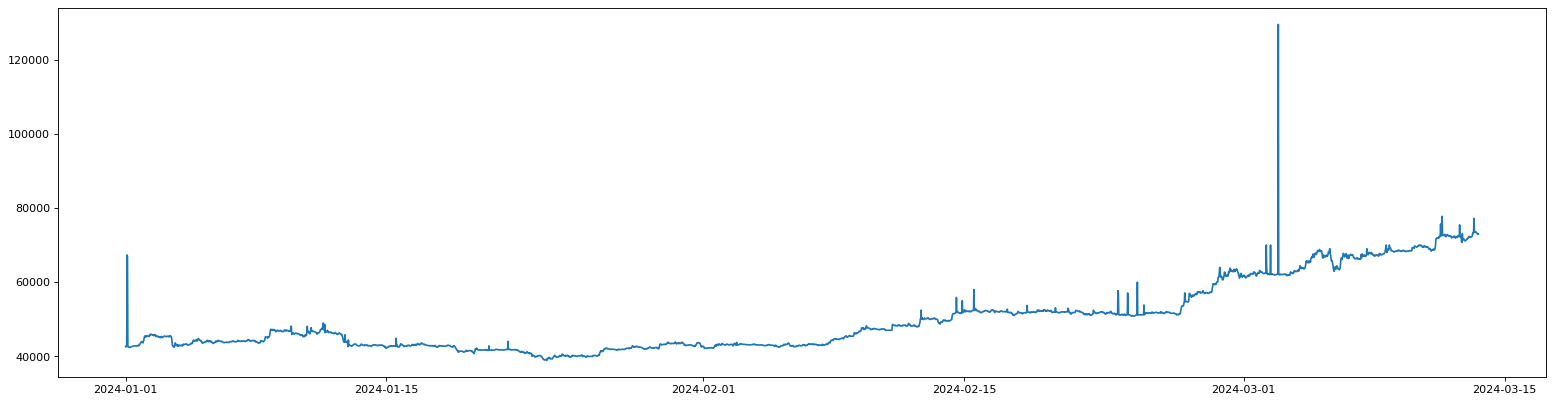

In [38]:
lags = ['2021-06-01', '2022-01-01', '2022-06-01', '2023-01-01', '2023-06-01', '2024-01-01', '2024-06-01']
for i in range(1, len(lags)):
    plt.figure(figsize=(24,6), dpi= 80)
    plt.plot('datetime', 'high', data=kline[(kline['datetime']>=lags[i-1])&(kline['datetime']<lags[i])])

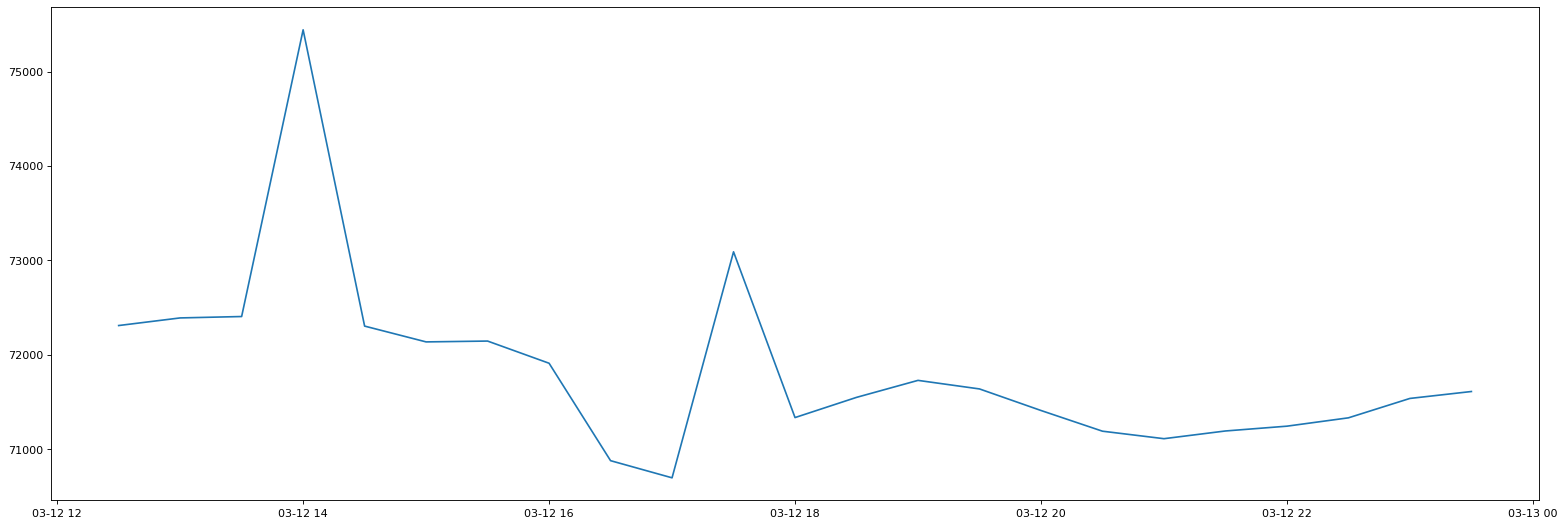

In [41]:
plt.figure(figsize=(24,8), dpi= 80)
plt.plot('datetime', 'high', data=kline[(kline['datetime']>'2024-03-12 12:00:00.000')&(kline['datetime']<'2024-03-13')])

1 2
2 3
3 4
4 5


In [1]:
def hello():
    print('hello')

In [2]:
3500/19700
25500*0.177

4513.5

In [5]:
import numpy as np
import pandas as pd

# create pandas dataframe with 10 rows and 3 columns with random values in range 0-1
df = pd.DataFrame(np.random.rand(10, 3), columns=['a', 'b', 'c'])
df


,a,b,c
0,0.503501,0.813194,0.925454
1,0.304901,0.292548,0.709226
2,0.479379,0.557243,0.397122
3,0.368168,0.017082,0.332745
4,0.991565,0.121104,0.333282
5,0.138608,0.684733,0.276411
6,0.579759,0.230941,0.877722
7,0.989244,0.414703,0.079987
8,0.400196,0.979625,0.346853
9,0.158297,0.369926,0.512290
